In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = [(i, random.random() * 3 + i + 5) for i in range(1, 31)]
data

[(1, 7.9746413811590235),
 (2, 8.924980160523885),
 (3, 9.297676718076612),
 (4, 9.797007036975547),
 (5, 11.833319511701143),
 (6, 12.831015410316564),
 (7, 12.676355183933367),
 (8, 14.908946019919865),
 (9, 15.962376785698968),
 (10, 15.700222051161395),
 (11, 16.941868181834945),
 (12, 19.6925320788213),
 (13, 19.014539262985153),
 (14, 20.242426817692333),
 (15, 22.98140578868326),
 (16, 21.454253473776593),
 (17, 22.38089653798624),
 (18, 25.521805384891493),
 (19, 25.189690348169645),
 (20, 25.207927713176577),
 (21, 28.4769355454991),
 (22, 28.5171319660458),
 (23, 29.961844607117207),
 (24, 31.220514814137594),
 (25, 30.35923320658331),
 (26, 33.040695807436805),
 (27, 34.157024168055386),
 (28, 34.19869152677205),
 (29, 35.712471038428106),
 (30, 35.060189330610356)]

In [3]:
Y = [d[1] for d in data]
X = np.vstack((np.array([d[0] for d in data]), np.ones(30))).T

def loss_function(a, b):
    sum = np.sum((Y - np.dot(X, [a, b]))**2)
    return sum

def df(a0, b0):
    point = np.random.randint(1, len(data))
    grad_a = -2 * (Y[point] - np.dot(X[point], [a0, b0])) * X[point, 0]
    grad_b = -2 * (Y[point] - np.dot(X[point], [a0, b0]))
    return np.array([grad_a, grad_b]) #градиент

w0 = np.array([0, 0])
res = []
learning_rate = 0.00001

while True:
    res.append(w0)
    w1 = w0 - learning_rate * df(*w0)
    if np.linalg.norm(w1 - w0) < 0.0001:
        break
    w0 = w1

def Dynamic(w):
    return w

result = Dynamic(w0)
result

array([1.21019867, 0.07059497])

In [4]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
theta_best

array([0.9933346 , 6.57793426])

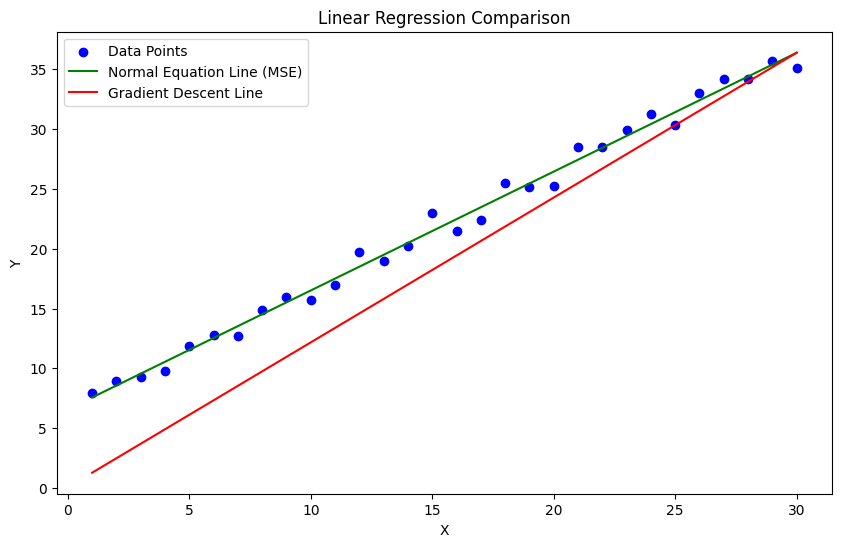

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, color='blue', label='Data Points')
plt.plot(X[:, 0], X.dot(theta_best), color='green', label='Normal Equation Line (MSE)')
plt.plot(X[:, 0], X.dot(res[-1]), color='red', label='Gradient Descent Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Comparison')
plt.legend()
plt.show()